[Install Libraries](#Install-Libraries)         <br>
[Import Dataset](#Import-Dataset)               <br>
[EDA](#EDA)                                     <br>
[-----Univariate analysis](#Univariate-analysis)<br>
[-----Bivariate analysis](#Bivariate-analysis)  <br>
[Data Preprocessing](#Data-Preprocessing)<br>
[Model Training](#Model_Training)

### Install Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [81]:
df=pd.read_csv('data.csv')

In [82]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


id: Unique ID for the customer<br>
Gender: Gender of the customer<br>
Age: Age of the customer<br>
Driving_License: [0 : Customer does not have DL, 1 : Customer already has DL]<br>
Region_Code: Unique code for the region of the customer<br>
Previously_Insured: [1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance]<br>
Vehicle_Age: Age of the Vehicle<br>
Vehicle_Damage: [1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.]<br>
Annual_Premium: The amount customer needs to pay as premium in the year<br>
Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.<br>
Vintage: Number of Days, Customer has been associated with the company<br>
Response: [1 : Customer is interested, 0 : Customer is not interested]<br>

### EDA

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [84]:
# insight >> Gender, Vehicle_Age, Vehiucle_Damage >> object

In [85]:
# shape of the data
df.shape

(381109, 12)

In [86]:
# check null values
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [87]:
# insight >>  data don't have null values

In [88]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [89]:
# insight >> may be Annual_Premium has outliers

In [90]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#### Univariate analysis

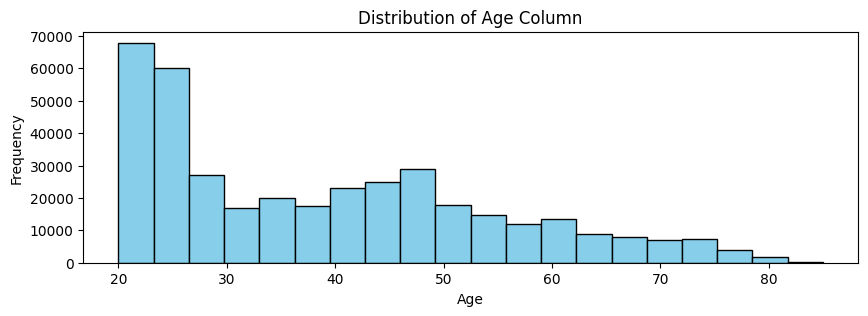

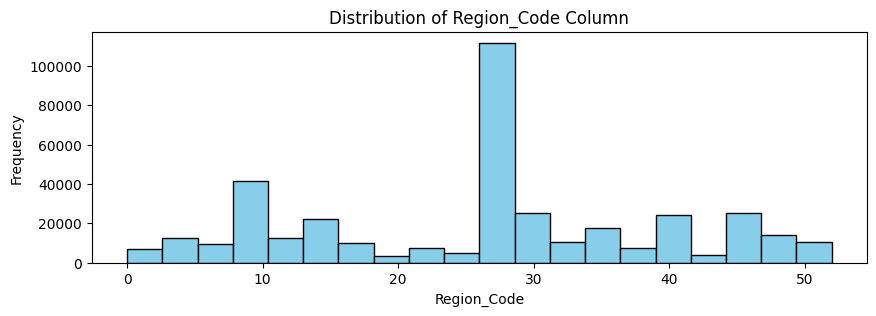

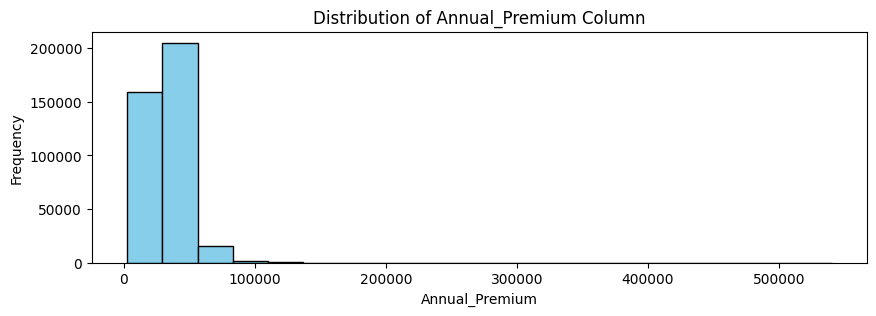

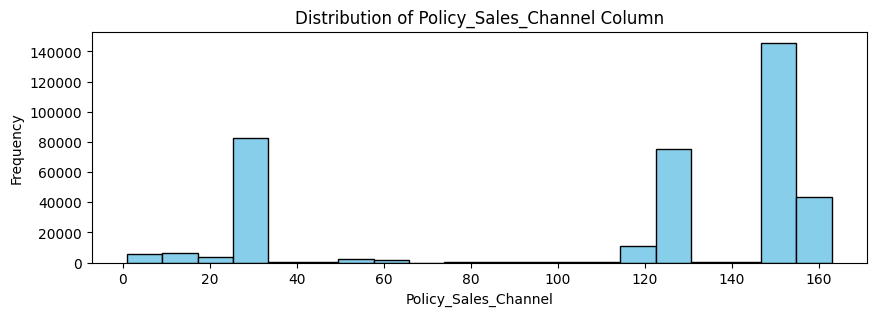

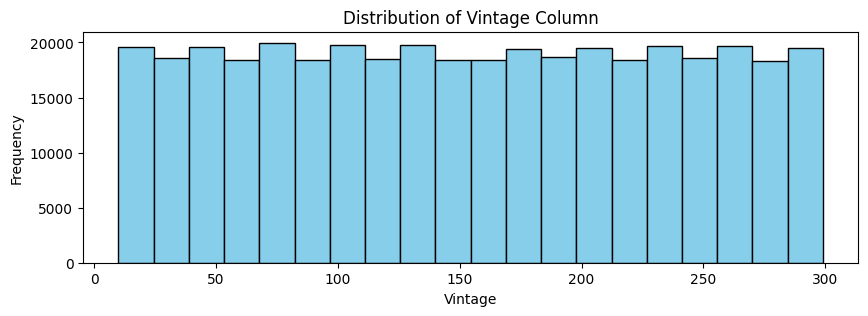

In [91]:

# List of continuous columns
cont_col = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

# Loop through each column to plot its distribution
for col in cont_col:
    plt.figure(figsize=(10,3))  # Create a new figure for each plot
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')  # Histogram for the column
    plt.title(f"Distribution of {col} Column")  # Title of the plot
    plt.xlabel(col)  # X-axis label
    plt.ylabel("Frequency")  # Y-axis label
    plt.show()  # Display the plot

    

In [92]:
# insights>> almost 20 to 27 age vale log jayada h 

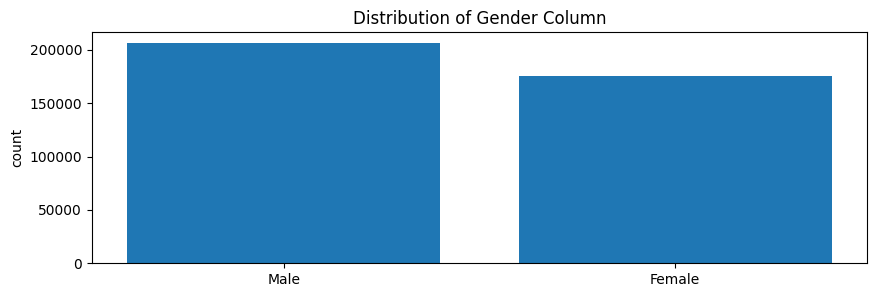

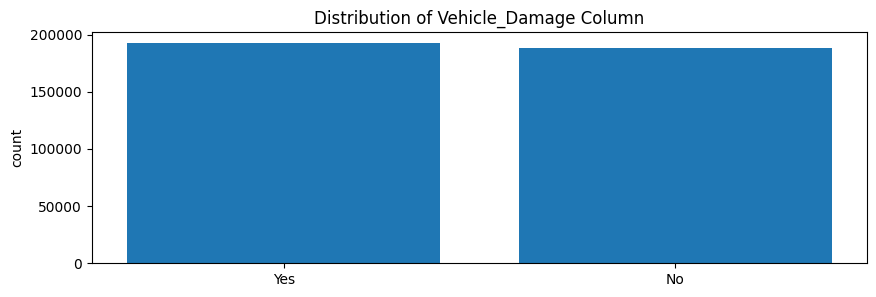

In [93]:
# Distribution of Gender and Vehicle_Damage

binary_clf_cols=['Gender', 'Vehicle_Damage']

for col in binary_clf_cols: 
    v_counts=df[col].value_counts()
    x=v_counts.index
    y=v_counts.values
    plt.figure(figsize=(10,3))
    plt.bar(x,y)
    plt.title(f"Distribution of {col} Column")
    plt.ylabel('count')
    plt.show()

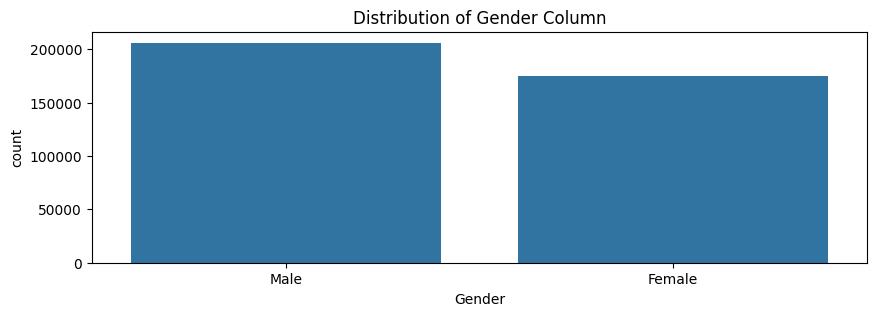

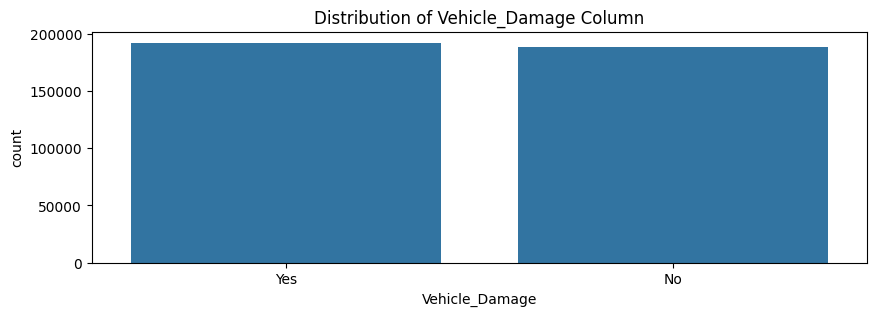

In [94]:
                                                        # or using sns.countplot


# Distribution of Gender and Vehicle_Damage

binary_clf_cols=['Gender', 'Vehicle_Damage']

for col in binary_clf_cols: 
    plt.figure(figsize=(10,3))
    sns.countplot(data=df, x=col)  
    plt.title(f"Distribution of {col} Column")
    plt.show()

In [95]:
df['Vehicle_Damage'].value_counts()

Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64

In [96]:
df['Gender'].value_counts()

Gender
Male      206089
Female    175020
Name: count, dtype: int64

In [97]:
# insights>>Gender -- male> female << but bhut jada difference nhi h
#      Vehicle_Damage >> almost half damaged  and half not damaged

In [98]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


2025-06-30 21:28:11,827 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-30 21:28:11,942 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


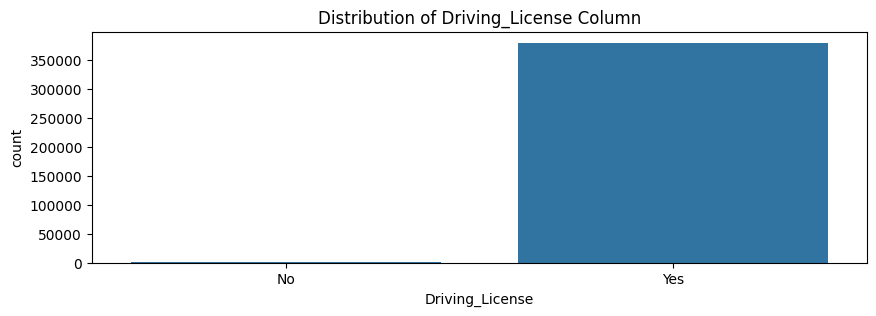

2025-06-30 21:28:12,187 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-30 21:28:12,306 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


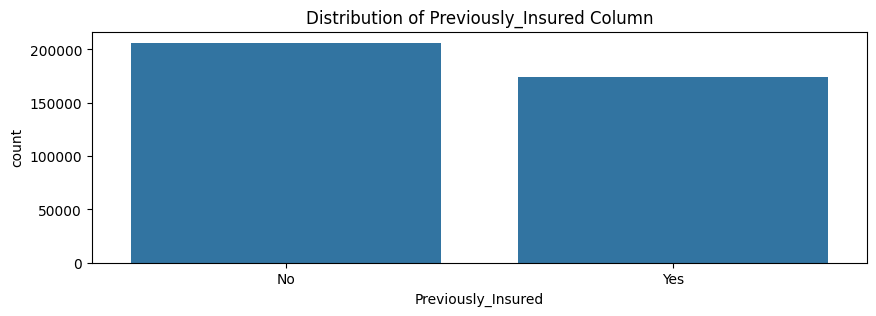

2025-06-30 21:28:12,551 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-30 21:28:12,673 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


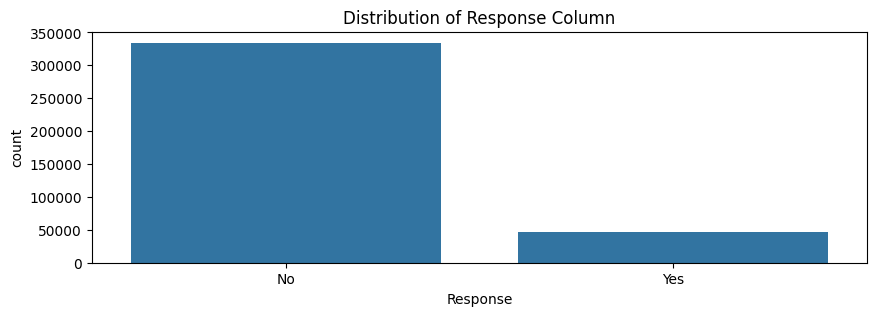

In [99]:
# distributtion  of Driving_License, Previously_insued, Response

binary_clf_cols=['Driving_License', 'Previously_Insured', 'Response']

for col in binary_clf_cols: 
    plt.figure(figsize=(10,3))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col} Column")
    plt.xticks([0, 1], ['No', 'Yes'])  # Add readable labels for categories
    plt.show()

In [100]:
df['Driving_License'].value_counts()

Driving_License
1    380297
0       812
Name: count, dtype: int64

In [101]:
df['Previously_Insured'].value_counts()

Previously_Insured
0    206481
1    174628
Name: count, dtype: int64

In [102]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [103]:
# insights>> 
    # Driving_ License >> almost all customerr have driving licence
    # Previously_insured --no> yes  .. but bahut jayada diff nhi h
    # Resposse --- not interrsted >> inteested coustomer     ------- Imbalanced dataset

In [104]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#### Bivariate analysis

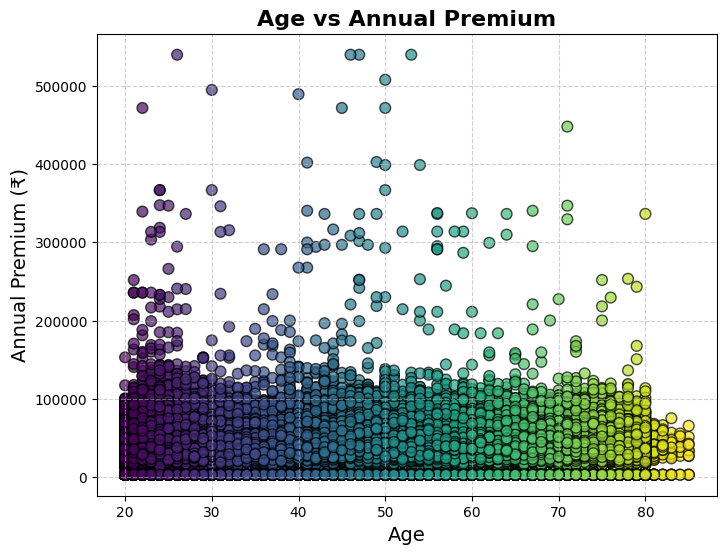

In [105]:
import matplotlib.pyplot as plt

# Setting the figure size
plt.figure(figsize=(8,6))

# Creating a scatter plot with a color map to make it visually appealing
plt.scatter(x=df['Age'], y=df['Annual_Premium'], c=df['Age'], cmap='viridis', edgecolors='black', alpha=0.7, s=60)

# Adding labels and title
plt.title('Age vs Annual Premium', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Annual Premium (₹)', fontsize=14)

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Showing the plot
plt.show()


#### Creshcourse on Groupby

In [106]:
GenRes=df.groupby(['Gender','Response'])

In [107]:
Gender=df.groupby('Gender')

In [108]:
len(Gender)

2

In [109]:
GenRes.size()

Gender  Response
Female  0           156835
        1            18185
Male    0           177564
        1            28525
dtype: int64

In [110]:
len(GenRes)

4

In [111]:
GenRes.count()

id     Age  Driving_License  Region_Code  \
Gender Response                                                 
Female 0         156835  156835           156835       156835   
       1          18185   18185            18185        18185   
Male   0         177564  177564           177564       177564   
       1          28525   28525            28525        28525   

                 Previously_Insured  Vehicle_Age  Vehicle_Damage  \
Gender Response                                                    
Female 0                     156835       156835          156835   
       1                      18185        18185           18185   
Male   0                     177564       177564          177564   
       1                      28525        28525           28525   

                 Annual_Premium  Policy_Sales_Channel  Vintage  
Gender Response                                                 
Female 0                 156835                156835   156835  
       1                  18185                 18185    18185  
Male   0                 177564                177564   177564  
       1                  28525                 28525    28525

In [112]:
GenRes['id'].count()

Gender  Response
Female  0           156835
        1            18185
Male    0           177564
        1            28525
Name: id, dtype: int64

In [113]:
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [114]:
GenRes['id'].count().to_frame()

id
Gender Response        
Female 0         156835
       1          18185
Male   0         177564
       1          28525

In [115]:
GenRes['id'].count().to_frame().rename(columns={'id':'count'})

count
Gender Response        
Female 0         156835
       1          18185
Male   0         177564
       1          28525

In [116]:
dup_Data=GenRes['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

In [117]:
dup_Data

,Gender,Response,count
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


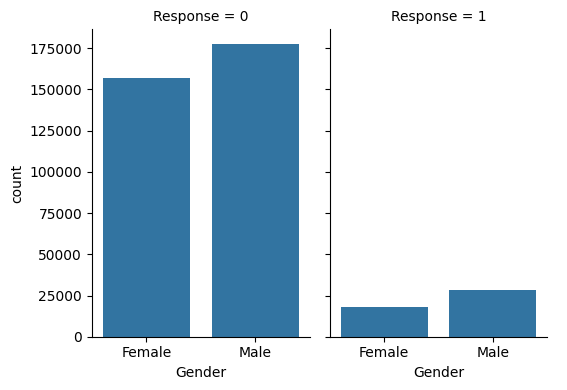

In [118]:
sns.catplot(x='Gender', y='count',col='Response', data=dup_Data, kind='bar', height=4, aspect=.7)

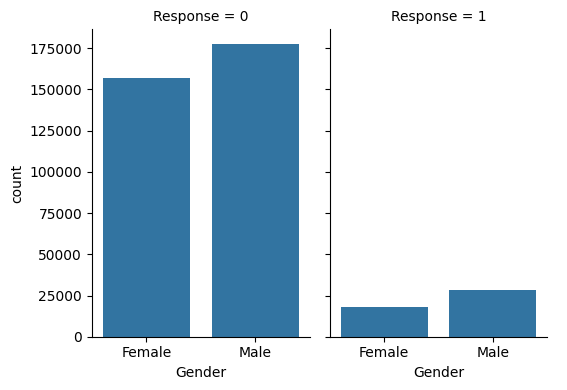

In [119]:
data = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Gender", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7)

In [120]:
df.groupby('Gender').size()

Gender
Female    175020
Male      206089
dtype: int64

In [121]:
df.groupby('Gender').count()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,,,,,,,,,,,
Female,175020,175020,175020,175020,175020,175020,175020,175020,175020,175020,175020
Male,206089,206089,206089,206089,206089,206089,206089,206089,206089,206089,206089


In [122]:
df.groupby(['Gender'])['Driving_License'].count()

Gender
Female    175020
Male      206089
Name: Driving_License, dtype: int64

In [123]:
df.groupby(['Gender'])['Driving_License'].count().to_frame()

,Driving_License
Gender,
Female,175020
Male,206089


In [124]:
df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

,Gender,Driving_License
0,Female,175020
1,Male,206089


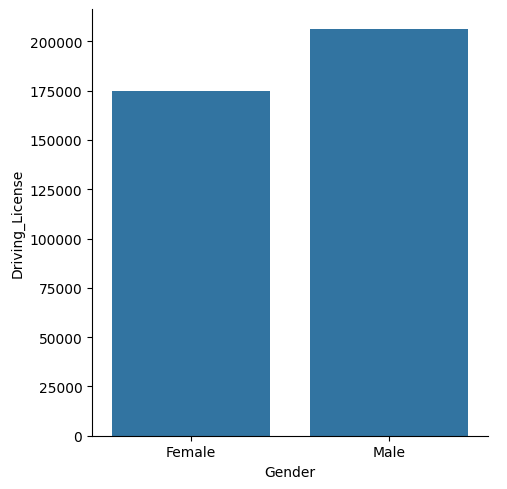

In [125]:
# driving license by gender

data=df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Driving_License", data=data, kind="bar")

In [126]:
df[df['Driving_License']==1]['Gender'].value_counts()

Gender
Male      205489
Female    174808
Name: count, dtype: int64

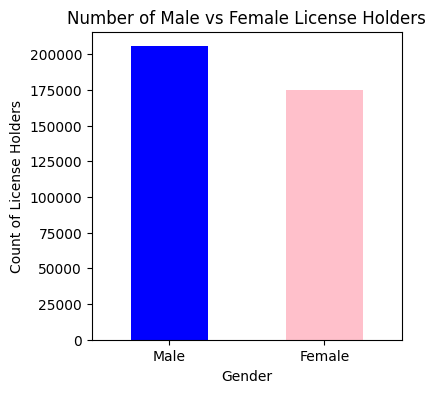

In [127]:
# Filter for only license holders (Driving_License == 1)
license_holders = df[df['Driving_License'] == 1]

# Group by Gender and count the number of license holders per gender
gender_counts = license_holders['Gender'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Male vs Female License Holders')
plt.xlabel('Gender')
plt.ylabel('Count of License Holders')
plt.xticks(rotation=0)
plt.show()

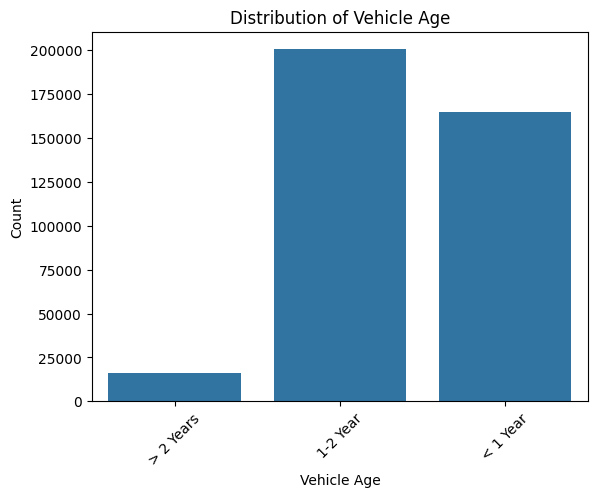

In [128]:
# checking vehicle age dist

sns.countplot(x='Vehicle_Age', data=df)
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Age')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.show()

In [129]:
df.groupby(['Vehicle_Age','Response']).size()

Vehicle_Age  Response
1-2 Year     0           165510
             1            34806
< 1 Year     0           157584
             1             7202
> 2 Years    0            11305
             1             4702
dtype: int64

In [130]:
df.groupby(['Vehicle_Age','Response']).count()

id  Gender     Age  Driving_License  Region_Code  \
Vehicle_Age Response                                                         
1-2 Year    0         165510  165510  165510           165510       165510   
            1          34806   34806   34806            34806        34806   
< 1 Year    0         157584  157584  157584           157584       157584   
            1           7202    7202    7202             7202         7202   
> 2 Years   0          11305   11305   11305            11305        11305   
            1           4702    4702    4702             4702         4702   

                      Previously_Insured  Vehicle_Damage  Annual_Premium  \
Vehicle_Age Response                                                       
1-2 Year    0                     165510          165510          165510   
            1                      34806           34806           34806   
< 1 Year    0                     157584          157584          157584   
            1                       7202            7202            7202   
> 2 Years   0                      11305           11305           11305   
            1                       4702            4702            4702   

                      Policy_Sales_Channel  Vintage  
Vehicle_Age Response                                 
1-2 Year    0                       165510   165510  
            1                        34806    34806  
< 1 Year    0                       157584   157584  
            1                         7202     7202  
> 2 Years   0                        11305    11305  
            1                         4702     4702

In [131]:
df.groupby(['Vehicle_Age','Response'])['id'].count()

Vehicle_Age  Response
1-2 Year     0           165510
             1            34806
< 1 Year     0           157584
             1             7202
> 2 Years    0            11305
             1             4702
Name: id, dtype: int64

In [132]:
df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame()

id
Vehicle_Age Response        
1-2 Year    0         165510
            1          34806
< 1 Year    0         157584
            1           7202
> 2 Years   0          11305
            1           4702

In [133]:
df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id': 'count'}).reset_index()

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


In [134]:

# Response vs Vehicle_Age

data=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
data

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


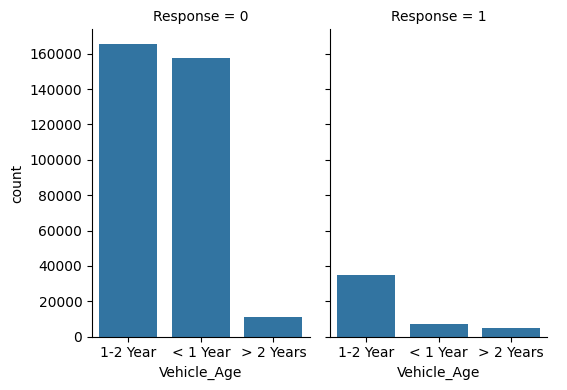

In [135]:
data=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",data=data, kind="bar",height=4, aspect=.7);

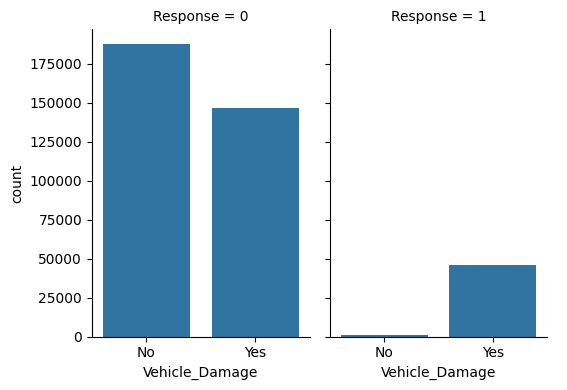

In [136]:
data = df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7);



## Data Preprocessing

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [138]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [139]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [140]:
# mapping 'Gender' col to (0, 1) values
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [141]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 34.9+ MB


In [142]:
# creating dummy cols for categorical features

df=pd.get_dummies(df,drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False


In [143]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     381109 non-null  int64  
 1   Gender                 381109 non-null  int64  
 2   Age                    381109 non-null  int64  
 3   Driving_License        381109 non-null  int64  
 4   Region_Code            381109 non-null  float64
 5   Previously_Insured     381109 non-null  int64  
 6   Annual_Premium         381109 non-null  float64
 7   Policy_Sales_Channel   381109 non-null  float64
 8   Vintage                381109 non-null  int64  
 9   Response               381109 non-null  int64  
 10  Vehicle_Age_< 1 Year   381109 non-null  bool   
 11  Vehicle_Age_> 2 Years  381109 non-null  bool   
 12  Vehicle_Damage_Yes     381109 non-null  bool   
dtypes: bool(3), float64(3), int64(7)
memory usage: 30.2 MB


In [144]:

# cols renaming and keeping dtype as int

df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      381109 non-null  int64  
 1   Gender                  381109 non-null  int64  
 2   Age                     381109 non-null  int64  
 3   Driving_License         381109 non-null  int64  
 4   Region_Code             381109 non-null  float64
 5   Previously_Insured      381109 non-null  int64  
 6   Annual_Premium          381109 non-null  float64
 7   Policy_Sales_Channel    381109 non-null  float64
 8   Vintage                 381109 non-null  int64  
 9   Response                381109 non-null  int64  
 10  Vehicle_Age_lt_1_Year   381109 non-null  int64  
 11  Vehicle_Age_gt_2_Years  381109 non-null  int64  
 12  Vehicle_Damage_Yes      381109 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 37.8 MB


In [146]:
# train-test split

from sklearn.model_selection import train_test_split

X=df.drop(['Response'], axis = 1)
y=df['Response']
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)  # by default test_size=0.25

In [147]:
X_train.shape , X_test.shape

((285831, 12), (95278, 12))

In [148]:
y_train.shape, y_test.shape

((285831,), (95278,))

In [149]:
num_feat

['Age', 'Vintage']

In [150]:
X_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
216376,216377,0,49,1,46.0,0,16588.0,26.0,149,0,0,1
154701,154702,1,56,1,41.0,1,2630.0,12.0,143,0,0,1
186998,186999,0,51,1,30.0,1,40332.0,152.0,220,0,0,0
280932,280933,0,43,1,48.0,0,2630.0,124.0,162,0,0,1
47683,47684,0,26,1,11.0,1,31337.0,152.0,140,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
359783,359784,1,27,1,28.0,1,33223.0,152.0,220,1,0,0
358083,358084,0,53,1,46.0,0,40971.0,26.0,131,0,1,1
152315,152316,1,22,1,45.0,1,30400.0,160.0,118,1,0,0
117952,117953,0,56,1,43.0,0,34849.0,157.0,229,0,1,1


In [151]:
# scaling the data

from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
X_train[num_feat] = ss.fit_transform(X_train[num_feat])
X_test[num_feat] = ss.transform(X_test[num_feat])


mm = MinMaxScaler()
X_train[['Annual_Premium']] = mm.fit_transform(X_train[['Annual_Premium']])
X_test['Annual_Premium'] = mm.transform(X_test[['Annual_Premium']])
# also, dropping id col now
id=df.id
df=df.drop('id',axis=1)

In [152]:
X_train.dtypes

id                          int64
Gender                      int64
Age                       float64
Driving_License             int64
Region_Code               float64
Previously_Insured          int64
Annual_Premium            float64
Policy_Sales_Channel      float64
Vintage                   float64
Vehicle_Age_lt_1_Year       int64
Vehicle_Age_gt_2_Years      int64
Vehicle_Damage_Yes          int64
dtype: object

## Model Training

In [153]:
import mlflow
import dagshub
import logging
import scipy.sparse

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ========== CONFIGURATION ==========
CONFIG = {
    'mlflow_tracking_url': 'https://dagshub.com/pank3004/MLOPS-Project-Vehicle-Insurance.mlflow',
    'dagshub_repo_owner': 'pank3004',
    'dagshub_repo_name': 'MLOPS-Project-Vehicle-Insurance',
    'experiment_name': 'ML Models for diff diff algos'
}

logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# ========== MLflow & DagsHub Setup ==========
logging.info('Setting up MLflow with DagsHub...')
mlflow.set_tracking_uri(CONFIG['mlflow_tracking_url'])
dagshub.init(
    repo_owner=CONFIG['dagshub_repo_owner'],
    repo_name=CONFIG['dagshub_repo_name'],
    mlflow=True
)
mlflow.set_experiment(CONFIG['experiment_name'])

# ========== MODEL DEFINITIONS ==========
ALGORITHMS = {
    'LogisticRegression': LogisticRegression(max_iter=5000),
    'XGBoost': XGBClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}

# ========== TRAIN AND EVALUATE FUNCTION ==========
def train_and_evaluate(X_train, X_test, y_train, y_test):
    # Scale features for models like Logistic Regression
    logging.info("Scaling features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    with mlflow.start_run(run_name='Structured Data Models') as parent_run:
        for algo_name, model in ALGORITHMS.items():
            with mlflow.start_run(run_name=f"{algo_name}", nested=True) as child_run:
                try:
                    logging.info(f"Training model: {algo_name}")
                    
                    # Choose scaled data for models that need it
                    if algo_name in ['LogisticRegression']:
                        model.fit(X_train_scaled, y_train)
                        y_pred = model.predict(X_test_scaled)
                    else:
                        model.fit(X_train, y_train)
                        y_pred = model.predict(X_test)

                    # Log hyperparameters
                    log_model_params(algo_name, model)

                    # Evaluate
                    metrics = {
                        "accuracy": accuracy_score(y_test, y_pred),
                        "precision": precision_score(y_test, y_pred),
                        "recall": recall_score(y_test, y_pred),
                        "f1_score": f1_score(y_test, y_pred)
                    }

                    mlflow.log_metrics(metrics)

                    # Skipping model logging to avoid DagsHub artifact upload error
                    logging.warning("Skipping model artifact logging due to DagsHub limitation.")

                    # Print results for verification
                    print(f"\nModel: {algo_name}")
                    print(f"Metrics: {metrics}")

                except Exception as e:
                    logging.error(f"Error training model {algo_name}: {e}")
                    mlflow.log_param("error", str(e))

# ========== LOG MODEL PARAMS FUNCTION ==========
def log_model_params(algo_name, model):
    params = {}
    if algo_name == 'LogisticRegression':
        params["C"] = model.C
        params["max_iter"] = model.max_iter
    elif algo_name == 'XGBoost':
        params["n_estimators"] = model.n_estimators
        params["learning_rate"] = model.learning_rate
    elif algo_name == 'RandomForest':
        params["n_estimators"] = model.n_estimators
        params["max_depth"] = model.max_depth
    elif algo_name == 'GradientBoosting':
        params["n_estimators"] = model.n_estimators
        params["learning_rate"] = model.learning_rate
        params["max_depth"] = model.max_depth
    mlflow.log_params(params)


# ========================== EXECUTION ==========================
if __name__ == "__main__":
    train_and_evaluate(X_train, X_test, y_train, y_test)


2025-06-30 21:28:20,429 - INFO - Setting up MLflow with DagsHub...
2025-06-30 21:28:21,063 - INFO - HTTP Request: GET https://dagshub.com/api/v1/repos/pank3004/MLOPS-Project-Vehicle-Insurance "HTTP/1.1 200 OK"


Initialized MLflow to track repo "pank3004/MLOPS-Project-Vehicle-Insurance"

2025-06-30 21:28:21,072 - INFO - Initialized MLflow to track repo "pank3004/MLOPS-Project-Vehicle-Insurance"


Repository pank3004/MLOPS-Project-Vehicle-Insurance initialized!

2025-06-30 21:28:21,075 - INFO - Repository pank3004/MLOPS-Project-Vehicle-Insurance initialized!
2025-06-30 21:28:21,462 - INFO - Scaling features...
2025-06-30 21:28:22,398 - INFO - Training model: LogisticRegression
2025-06-30 21:28:24,317 - WARNING - Skipping model artifact logging due to DagsHub limitation.



Model: LogisticRegression
Metrics: {'accuracy': 0.8774323558429018, 'precision': 0.2857142857142857, 'recall': 0.00017130620985010707, 'f1_score': 0.000342407122068139}
🏃 View run LogisticRegression at: https://dagshub.com/pank3004/MLOPS-Project-Vehicle-Insurance.mlflow/#/experiments/0/runs/ea81be1a4b5545f6895ef1e3b86582fc
🧪 View experiment at: https://dagshub.com/pank3004/MLOPS-Project-Vehicle-Insurance.mlflow/#/experiments/0


2025-06-30 21:28:25,761 - INFO - Training model: XGBoost
2025-06-30 21:28:27,837 - WARNING - Skipping model artifact logging due to DagsHub limitation.



Model: XGBoost
Metrics: {'accuracy': 0.8766976636789185, 'precision': 0.4499314128943759, 'recall': 0.02809421841541756, 'f1_score': 0.05288616575298291}
🏃 View run XGBoost at: https://dagshub.com/pank3004/MLOPS-Project-Vehicle-Insurance.mlflow/#/experiments/0/runs/852f8bc6166a402f8a2874987305602b
🧪 View experiment at: https://dagshub.com/pank3004/MLOPS-Project-Vehicle-Insurance.mlflow/#/experiments/0


2025-06-30 21:28:29,286 - INFO - Training model: RandomForest
2025-06-30 21:29:05,604 - WARNING - Skipping model artifact logging due to DagsHub limitation.



Model: RandomForest
Metrics: {'accuracy': 0.8720691030458237, 'precision': 0.38506261180679785, 'recall': 0.07374732334047109, 'f1_score': 0.12378693120552081}
🏃 View run RandomForest at: https://dagshub.com/pank3004/MLOPS-Project-Vehicle-Insurance.mlflow/#/experiments/0/runs/b95b52e8f1a0460ea4d2658f8206cbf4
🧪 View experiment at: https://dagshub.com/pank3004/MLOPS-Project-Vehicle-Insurance.mlflow/#/experiments/0


2025-06-30 21:29:07,046 - INFO - Training model: GradientBoosting
2025-06-30 21:29:39,201 - WARNING - Skipping model artifact logging due to DagsHub limitation.



Model: GradientBoosting
Metrics: {'accuracy': 0.8774428514452445, 'precision': 0.4, 'recall': 0.00034261241970021415, 'f1_score': 0.0006846384253316217}
🏃 View run GradientBoosting at: https://dagshub.com/pank3004/MLOPS-Project-Vehicle-Insurance.mlflow/#/experiments/0/runs/4b4125be814f4ae29e842d95d1481490
🧪 View experiment at: https://dagshub.com/pank3004/MLOPS-Project-Vehicle-Insurance.mlflow/#/experiments/0
🏃 View run Structured Data Models at: https://dagshub.com/pank3004/MLOPS-Project-Vehicle-Insurance.mlflow/#/experiments/0/runs/8544c9c474e644119783aa0115cf0748
🧪 View experiment at: https://dagshub.com/pank3004/MLOPS-Project-Vehicle-Insurance.mlflow/#/experiments/0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [ ]:
model.best_params_

{'n_estimators': 300,
 'min_samples_split': 7,
 'min_samples_leaf': 8,
 'max_depth': 3,
 'criterion': 'gini'}

In [ ]:
# save model: 
import pickle
filename='rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))

## Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

y_pred=model.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



c:\Users\91830\anaconda3\envs\vehicle\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91830\anaconda3\envs\vehicle\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91830\anaconda3\envs\vehicle\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
